In [20]:
import pandas as pd
import numpy as np
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
import seaborn as sns

In [21]:
df = pd.read_csv('neew.csv')

/var/folders/wr/8dtktkf96kbf1b8fg55tb8x80000gn/T/ipykernel_22120/927091276.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.


In [22]:
df.head(3)

,id,airline,source_city,departure_time,stops,arrival_time,destination_city,distance,class,duration,days_left,price,lati_source_city,long_source_city,lati_destination,long_destination,origin_airport_capacity,arrival_airport_capacity,origin_GDP,des_GDP
0,0,SpiceJet,New Delhi,Evening,zero,Night,Mumbai,1160.540574,Economy,2.17,1,5953,28.6139,77.2089,18.975,72.8258,39339998,21747892,598922,224309
1,1,SpiceJet,New Delhi,Early_Morning,zero,Morning,Mumbai,1160.540574,Economy,2.33,1,5953,28.6139,77.2089,18.975,72.8258,39339998,21747892,598922,224309
2,2,AirAsia,New Delhi,Early_Morning,zero,Early_Morning,Mumbai,1160.540574,Economy,2.17,1,5956,28.6139,77.2089,18.975,72.8258,39339998,21747892,598922,224309


In [23]:
df = df.drop(['id','lati_source_city', 'long_source_city', 'lati_destination', 'long_destination'], axis=1)

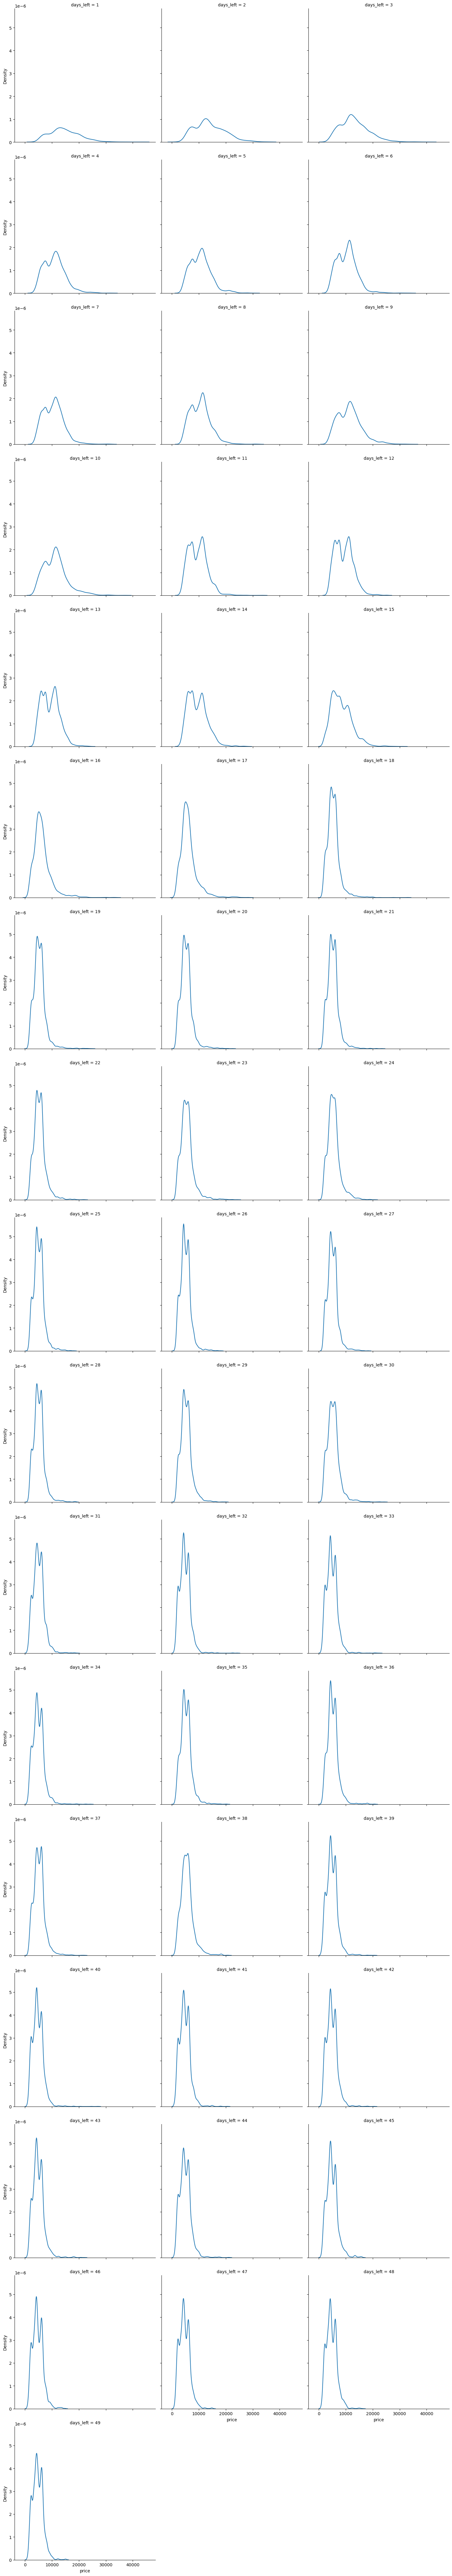

In [24]:
# sns.displot(data=df[df['class']=='Economy'], kind='kde', x='price', col='days_left', col_wrap=3)

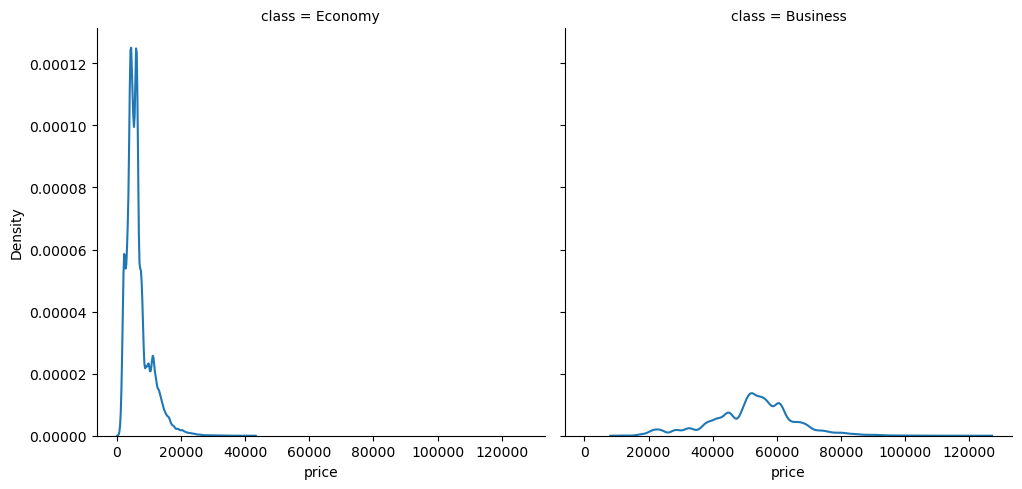

In [25]:
sns.displot(data=df, kind='kde', x='price', col='class', col_wrap=3)

In [26]:
df.to_csv('price.csv', index=False)

In [27]:
df.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,distance,class,duration,days_left,price,origin_airport_capacity,arrival_airport_capacity,origin_GDP,des_GDP
0,SpiceJet,New Delhi,Evening,zero,Night,Mumbai,1160.540574,Economy,2.17,1,5953,39339998,21747892,598922,224309
1,SpiceJet,New Delhi,Early_Morning,zero,Morning,Mumbai,1160.540574,Economy,2.33,1,5953,39339998,21747892,598922,224309
2,AirAsia,New Delhi,Early_Morning,zero,Early_Morning,Mumbai,1160.540574,Economy,2.17,1,5956,39339998,21747892,598922,224309


In [32]:
df['des_GDP'] = df['des_GDP'].apply(lambda x: str(x).replace(',',''))
df['des_GDP'] = df['des_GDP'].astype('float')

In [ ]:
# function that iterates through the dataframe and returns the value of the column

def get_value(row_number, assigned_value):

return assigned_value[row_number]

# list of values from which we want to assign

assigned_value = df['des_GDP']

# new column that calls our function


df['des_GDP'] = df['des_GDP'].apply(get_value, args=(assigned_value,))

df.head(3)

df['des_GDP'] = df['des_GDP'].astype('float')

df.head(3)



In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   airline                   300153 non-null  object 
 1   source_city               300153 non-null  object 
 2   departure_time            300153 non-null  object 
 3   stops                     300153 non-null  object 
 4   arrival_time              300153 non-null  object 
 5   destination_city          300153 non-null  object 
 6   distance                  300153 non-null  float64
 7   class                     300153 non-null  object 
 8   duration                  300153 non-null  float64
 9   days_left                 300153 non-null  int64  
 10  price                     300153 non-null  int64  
 11  origin_airport_capacity   300153 non-null  int64  
 12  arrival_airport_capacity  300153 non-null  int64  
 13  origin_GDP                300153 non-null  i

In [38]:
df.to_csv('price.csv', index=False)